In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import scvelo as scv
import latentvelo as ltv
import pandas as pd
import seaborn as sns

Global seed set to 0


# Pancreas

In [2]:
pancreas_latent = sc.read('real_data/fits/pancreas_latent_adata.h5ad')

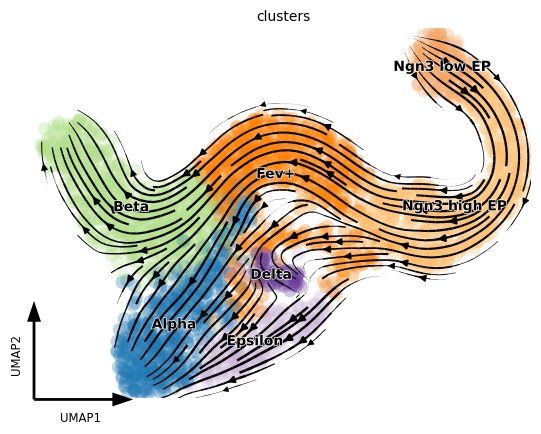

In [3]:
scv.pl.velocity_embedding_stream(pancreas_latent, vkey='spliced_velocity', color_map='coolwarm', frameon='artist')

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, roc_auc_score

clf = LogisticRegression(penalty='none', max_iter=1e4) #SVC() #DecisionTreeClassifier()

data_= pancreas_latent[pancreas_latent.obs['clusters'].isin(['Epsilon', 'Alpha', 'Beta', 'Delta'])].copy()

X = data_.obsm['zr']
y = LabelEncoder().fit_transform(data_.obs['clusters'].values)


pancreas_cvs = cross_val_score(clf, X, y, cv=25)
print(np.mean(pancreas_cvs))

0.9545399698340874


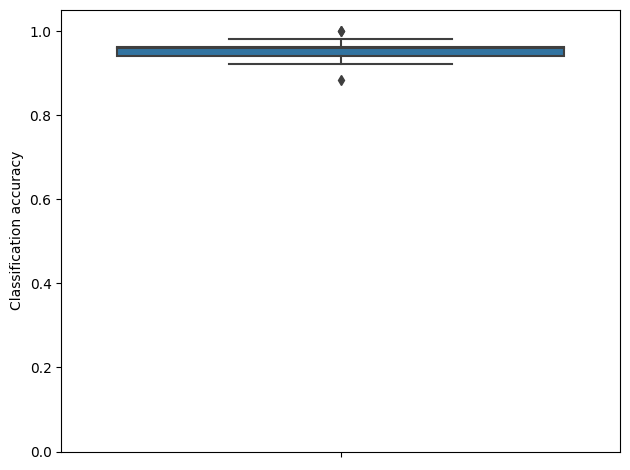

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()#figsize=(3,5))
#sns.stripplot(y=cvs, ax=ax)
sns.boxplot(y=pancreas_cvs, ax=ax)

#plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
#plt.setp(ax.lines, color='k')

ax.set(ylim=(0,1.05))
ax.set(ylabel='Classification accuracy')
plt.tight_layout()
plt.savefig('figures/pancreas_accuracy.pdf')
plt.show()

Renamed 'zr' to convention 'X_zr' (adata.obsm).


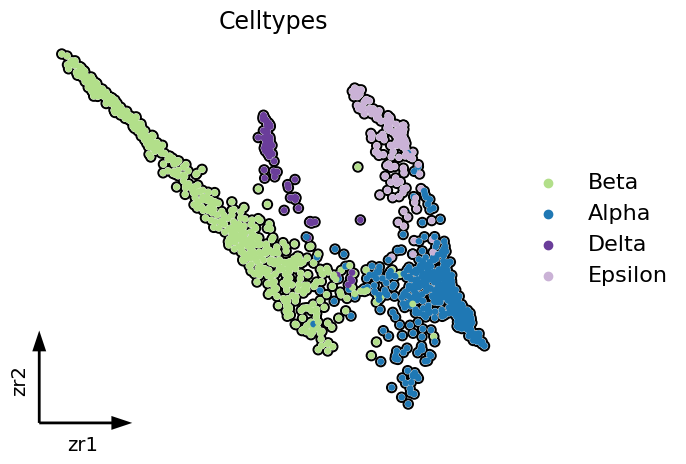

In [6]:
scv.pl.scatter(pancreas_latent[pancreas_latent.obs.clusters.isin(['Epsilon', 'Alpha', 'Beta', 'Delta'])],
               'zr', color='clusters', frameon='artist', title='Celltypes', fontsize=17,
              legend_fontsize=16, add_outline=True, legend_loc='right',
              figsize=(6,5))

In [7]:
pancreas_edges = [
    ('Ngn3 low EP', 'Ngn3 high EP'), 
    ('Ngn3 high EP', 'Fev+'),
    ('Fev+', 'Delta'), 
    ('Fev+', 'Beta'), ('Fev+','Epsilon'), ('Fev+','Alpha')]

In [8]:
pancreas_latent.obsm['X_latent'] = pancreas_latent.X
pancreas_latent.obsm['spliced_velocity_latent'] = pancreas_latent.layers['spliced_velocity']

In [9]:
pancreas_scores = ltv.ev.cross_boundary_correctness(pancreas_latent,
                                  'clusters', 'spliced_velocity_latent', pancreas_edges, x_emb='X_latent', 
                                                     majority_vote=True, return_raw=True)

In [10]:
scv.tl.velocity_embedding(pancreas_latent, vkey='spliced_velocity', basis='pca')
pancreas_pca = ltv.ev.cross_boundary_correctness(pancreas_latent,
                                  'clusters', 'spliced_velocity_pca', pancreas_edges, x_emb='X_pca', 
                                                  majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)


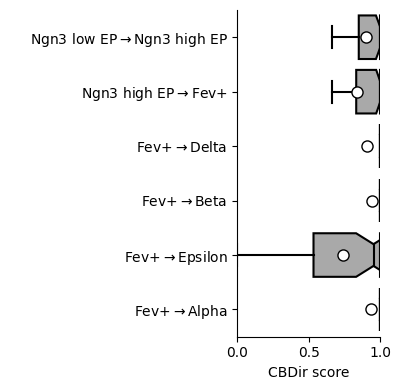

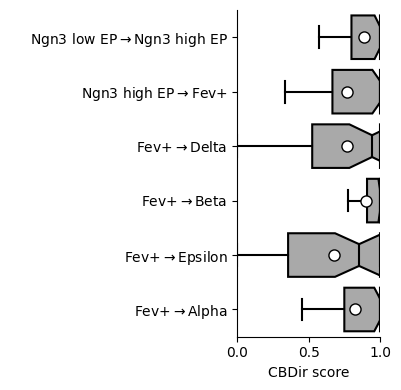

In [11]:
ax=ltv.pl.transition_scores(pancreas_scores, raw=True)
ax.set(xlim=(0,1))
plt.show()

ax=ltv.pl.transition_scores(pancreas_pca, raw=True)
ax.set(xlim=(0,1))
plt.show()

In [12]:
pancreas_latent.obsm['X_pca_10'] = pancreas_latent.obsm['X_pca'][:,:10]
scv.tl.velocity_embedding(pancreas_latent, vkey='spliced_velocity', basis='pca_10')
pancreas_pca_10 = ltv.ev.cross_boundary_correctness(pancreas_latent,
                                  'clusters', 'spliced_velocity_pca_10', pancreas_edges, x_emb='X_pca_10', 
                                                     majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_10', embedded velocity vectors (adata.obsm)


In [13]:
pancreas_iccoh_pca = ltv.ev.inner_cluster_coh(pancreas_latent,
                                  'clusters', 'spliced_velocity_pca', return_raw=True, layer=False)

pancreas_iccoh_pca_10 = ltv.ev.inner_cluster_coh(pancreas_latent,
                                  'clusters', 'spliced_velocity_pca_10', return_raw=True, layer=False)

# Retina

In [14]:
retina_latent = sc.read('real_data/fits/retina_latent_adata.h5ad')

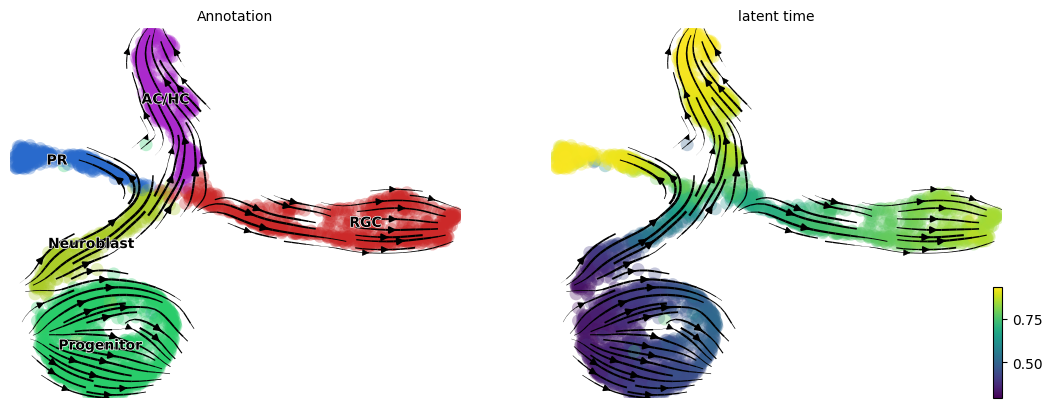

In [15]:
scv.pl.velocity_embedding_stream(retina_latent, basis='umap',vkey='spliced_velocity', color=['Annotation', 'latent_time'])

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, roc_auc_score

clf = LogisticRegression(penalty='none') #SVC() #DecisionTreeClassifier()

data_= retina_latent[retina_latent.obs['Annotation'].isin(['PR', 'AC/HC', 'RGC'])].copy()
X = data_.obsm['zr']
y = LabelEncoder().fit_transform(data_.obs['Annotation'].values)


retina_cvs = cross_val_score(clf, X, y, cv=25)
print(np.mean(retina_cvs))

0.9790775681341719


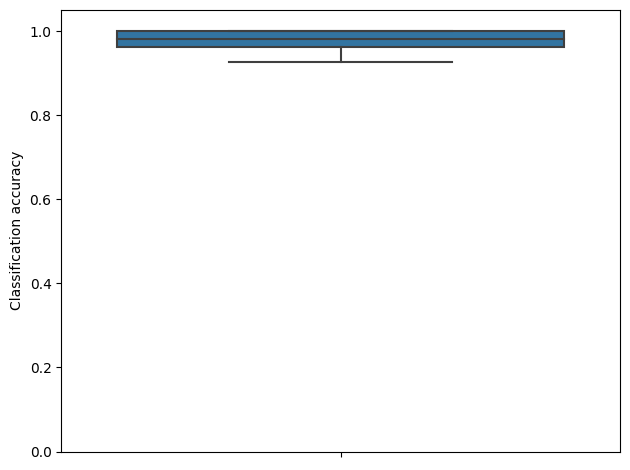

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()#figsize=(3,5))
#sns.stripplot(y=cvs, ax=ax)
sns.boxplot(y=retina_cvs, ax=ax)

#plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
#plt.setp(ax.lines, color='k')

ax.set(ylim=(0,1.05))
ax.set(ylabel='Classification accuracy')
plt.tight_layout()
#plt.savefig('figures/retina_accuracy.pdf')
plt.show()

Renamed 'zr' to convention 'X_zr' (adata.obsm).


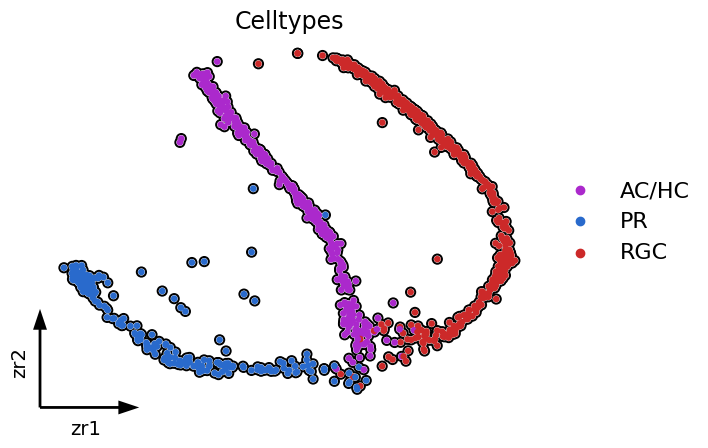

In [18]:
scv.pl.scatter(retina_latent[retina_latent.obs.Annotation.isin(['AC/HC', 'PR', 'RGC'])],
               'zr', color='Annotation', frameon='artist', title='Celltypes', fontsize=17,
              legend_fontsize=16, add_outline=True, legend_loc='right')#, save='figures/retina_reg.pdf')

In [19]:
retina_edges = [
    ('Neuroblast', 'PR'),
    ('Neuroblast', 'AC/HC'), 
    ('Neuroblast', 'RGC')]

In [20]:
retina_latent.obsm['X_latent'] = retina_latent.X
retina_latent.obsm['spliced_velocity_latent'] = retina_latent.layers['spliced_velocity']

In [21]:
retina_scores = ltv.ev.cross_boundary_correctness(retina_latent,
                                  'Annotation', 'spliced_velocity_latent', retina_edges, 
                                  x_emb='X_latent', majority_vote=True, return_raw=True)

In [22]:
scv.tl.velocity_embedding(retina_latent, vkey='spliced_velocity', basis='pca')
retina_pca = ltv.ev.cross_boundary_correctness(retina_latent,
                                  'Annotation', 'spliced_velocity_pca', retina_edges, x_emb='X_pca', 
                                   majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:01) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)


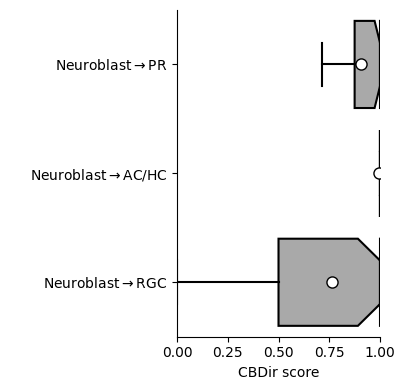

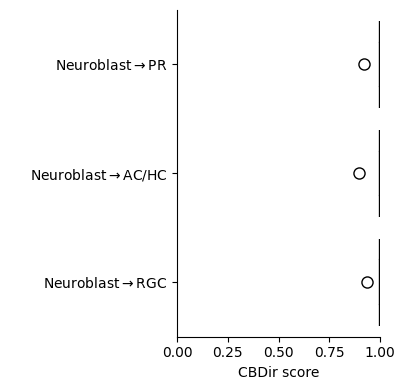

In [23]:
ax=ltv.pl.transition_scores(retina_scores, raw=True)
ax.set(xlim=(0,1))
plt.show()

ax=ltv.pl.transition_scores(retina_pca, raw=True)
ax.set(xlim=(0,1))
plt.show()

In [24]:
retina_latent.obsm['X_pca_10'] = retina_latent.obsm['X_pca'][:,:10]
scv.tl.velocity_embedding(retina_latent, vkey='spliced_velocity', basis='pca_10')
retina_pca_10 = ltv.ev.cross_boundary_correctness(retina_latent,
                                  'Annotation', 'spliced_velocity_pca_10', retina_edges, 
                                                   x_emb='X_pca_10', majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_10', embedded velocity vectors (adata.obsm)


In [25]:
retina_iccoh_pca = ltv.ev.inner_cluster_coh(retina_latent,
                                  'Annotation', 'spliced_velocity_pca', return_raw=True, layer=False)

retina_iccoh_pca_10 = ltv.ev.inner_cluster_coh(retina_latent,
                                  'Annotation', 'spliced_velocity_pca_10', return_raw=True, layer=False)

# Mouse erythroid

In [26]:
erythroid_latent = sc.read('real_data/fits/erythroid_latent_adata.h5ad')

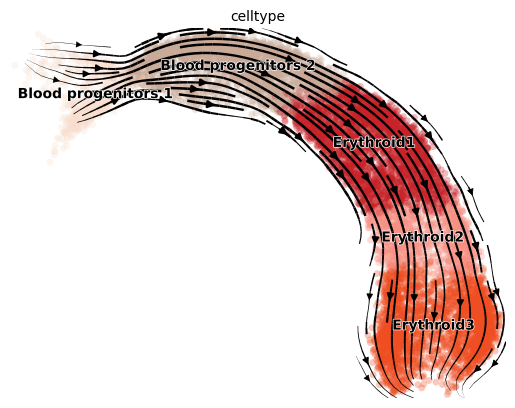

In [27]:
scv.pl.velocity_embedding_stream(erythroid_latent, vkey='spliced_velocity', color='celltype')

In [28]:
erythroid_edges = [
    ('Blood progenitors 1', 'Blood progenitors 2'), 
    ('Blood progenitors 2', 'Erythroid1'),
    ('Erythroid1', 'Erythroid2'), 
    ('Erythroid2', 'Erythroid3')]

In [29]:
erythroid_latent.obsm['X_latent'] = erythroid_latent.X
erythroid_latent.obsm['spliced_velocity_latent'] =erythroid_latent.layers['spliced_velocity']

In [30]:
erythroid_scores = ltv.ev.cross_boundary_correctness(erythroid_latent,
                                  'celltype', 'spliced_velocity_latent', erythroid_edges, 
                                  x_emb='X_latent', majority_vote=True, return_raw=True)

In [31]:
scv.tl.velocity_embedding(erythroid_latent, vkey='spliced_velocity', basis='pca')
erythroid_pca = ltv.ev.cross_boundary_correctness(erythroid_latent,
                                  'celltype', 'spliced_velocity_pca', erythroid_edges, x_emb='X_pca', 
                                   majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:04) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)


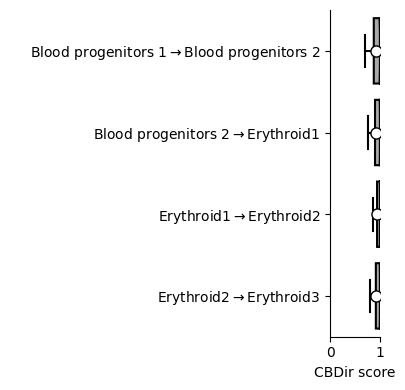

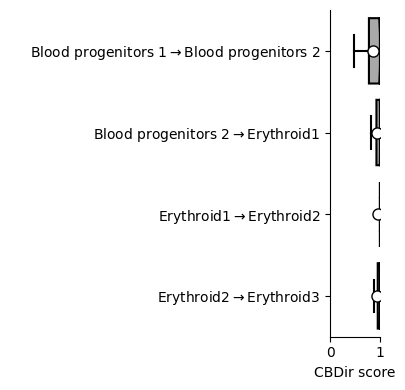

In [32]:
ax=ltv.pl.transition_scores(erythroid_scores, raw=True)
ax.set(xlim=(0,1))
plt.show()

ax=ltv.pl.transition_scores(erythroid_pca, raw=True)
ax.set(xlim=(0,1))
plt.show()

In [33]:
erythroid_latent.obsm['X_pca_10'] = erythroid_latent.obsm['X_pca'][:,:10]
scv.tl.velocity_embedding(erythroid_latent, vkey='spliced_velocity', basis='pca_10')
erythroid_pca_10 = ltv.ev.cross_boundary_correctness(erythroid_latent,
                                  'celltype', 'spliced_velocity_pca_10', erythroid_edges, x_emb='X_pca_10', majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:01) --> added
    'spliced_velocity_pca_10', embedded velocity vectors (adata.obsm)


In [34]:
erythroid_iccoh_pca = ltv.ev.inner_cluster_coh(erythroid_latent,
                                  'celltype', 'spliced_velocity_pca', return_raw=True, layer=False)

erythroid_iccoh_pca_10 = ltv.ev.inner_cluster_coh(erythroid_latent,
                                  'celltype', 'spliced_velocity_pca_10', return_raw=True, layer=False)

# Human bone marrow

In [35]:
bonemarrow_latent = sc.read('real_data/fits/bonemarrow_latent_adata.h5ad')

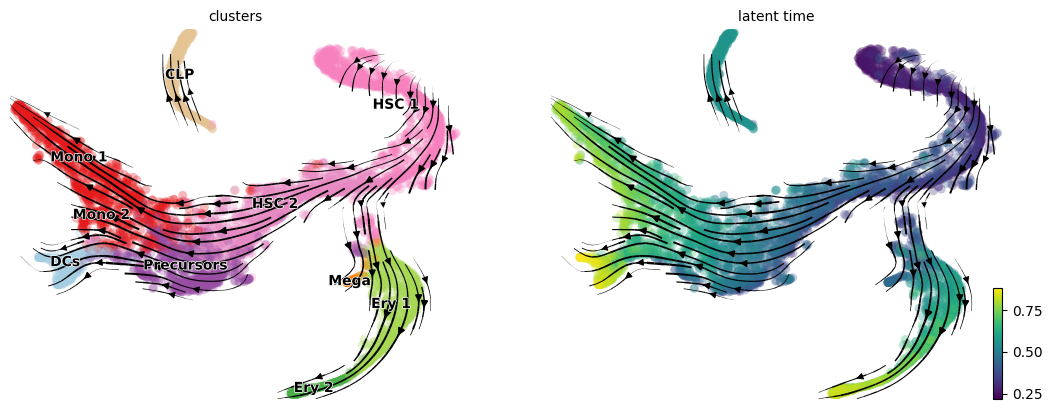

In [36]:
scv.pl.velocity_embedding_stream(bonemarrow_latent, basis='tsne',vkey='spliced_velocity', color=['clusters', 'latent_time'])

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, roc_auc_score

clf = LogisticRegression(penalty='none') #SVC() #DecisionTreeClassifier()

data_= bonemarrow_latent[bonemarrow_latent.obs['clusters'].isin(['Mono_1', 'DCs', 'Ery_2', 'Mega', 'CLP'])].copy()
X = data_.obsm['zr']
y = LabelEncoder().fit_transform(data_.obs['clusters'].values)


bonemarrow_cvs = cross_val_score(clf, X, y, cv=25)
print(np.mean(bonemarrow_cvs))

0.9831691965938542


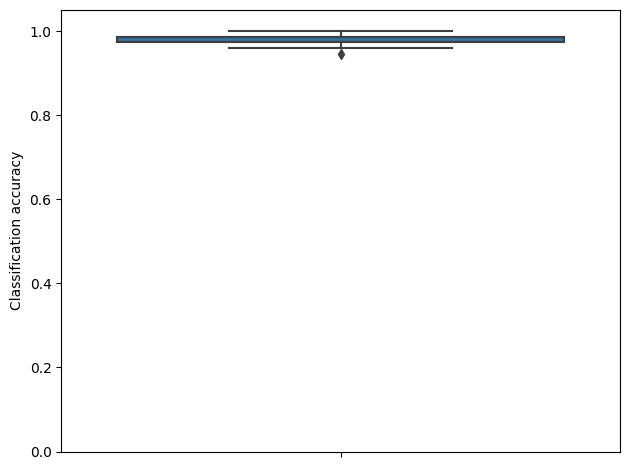

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()#figsize=(3,5))
#sns.stripplot(y=cvs, ax=ax)
sns.boxplot(y=bonemarrow_cvs, ax=ax)

#plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
#plt.setp(ax.lines, color='k')

ax.set(ylim=(0,1.05))
ax.set(ylabel='Classification accuracy')
plt.tight_layout()
plt.savefig('figures/bonemarrow_accuracy.pdf')
plt.show()

Renamed 'zr' to convention 'X_zr' (adata.obsm).


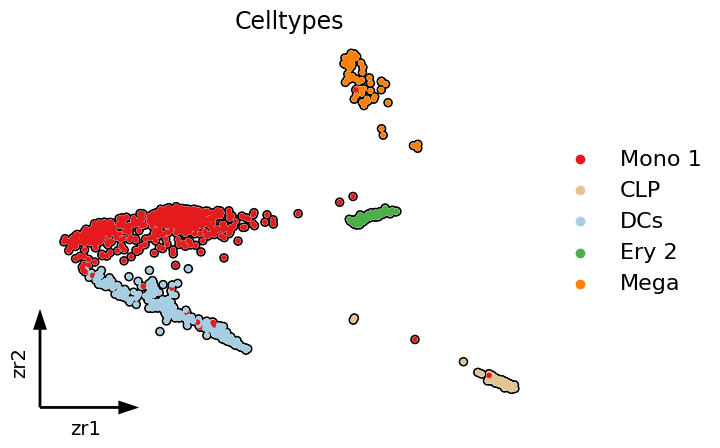

In [39]:
scv.pl.scatter(bonemarrow_latent[bonemarrow_latent.obs.clusters.isin(['Mono_1', 'DCs', 'Ery_2', 'Mega', 'CLP'])],
               'zr', color='clusters', frameon='artist', title='Celltypes', fontsize=17,
              legend_fontsize=16, add_outline=True, legend_loc='right')#, save='figures/bonemarrow_reg.pdf')

In [40]:
bonemarrow_edges = [
    ('HSC_1', 'CLP'),
    ('HSC_1', 'Mega'),
    ('HSC_1', 'Ery_1'), 
    ('Ery_1', 'Ery_2'),
    ('HSC_1', 'HSC_2'),
    ('HSC_2','Precursors'),
    ('HSC_2', 'Mono_2'),
    ('HSC_2', 'Mono_1'),
    ('Precursors','DCs')]

In [41]:
bonemarrow_latent.obsm['X_latent'] = bonemarrow_latent.X
bonemarrow_latent.obsm['spliced_velocity_latent'] = bonemarrow_latent.layers['spliced_velocity']

In [42]:
bonemarrow_scores = ltv.ev.cross_boundary_correctness(bonemarrow_latent,
                                  'clusters', 'spliced_velocity_latent', bonemarrow_edges, 
                                  x_emb='X_latent', majority_vote=True, return_raw=True)

In [43]:
scv.tl.velocity_embedding(bonemarrow_latent, vkey='spliced_velocity', basis='pca')
bonemarrow_pca = ltv.ev.cross_boundary_correctness(bonemarrow_latent,
                                  'clusters', 'spliced_velocity_pca', bonemarrow_edges, x_emb='X_pca', 
                                   majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:02) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)


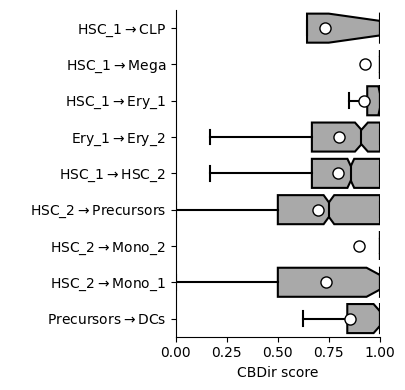

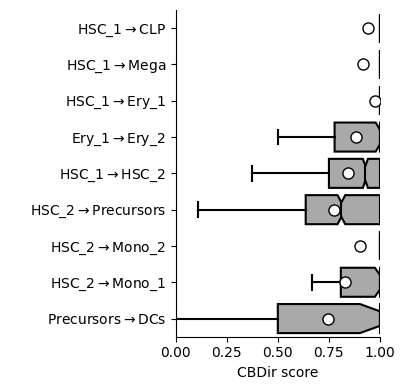

In [44]:
ax=ltv.pl.transition_scores(bonemarrow_scores, raw=True)
ax.set(xlim=(0,1))
plt.show()

ax=ltv.pl.transition_scores(bonemarrow_pca, raw=True)
ax.set(xlim=(0,1))
plt.show()

In [45]:
bonemarrow_latent.obsm['X_pca_10'] = bonemarrow_latent.obsm['X_pca'][:,:10]
scv.tl.velocity_embedding(bonemarrow_latent, vkey='spliced_velocity', basis='pca_10')
bonemarrow_pca_10 = ltv.ev.cross_boundary_correctness(bonemarrow_latent,
                                  'clusters', 'spliced_velocity_pca_10', bonemarrow_edges, 
                                                       x_emb='X_pca_10', majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_10', embedded velocity vectors (adata.obsm)


In [46]:
bonemarrow_iccoh_pca = ltv.ev.inner_cluster_coh(bonemarrow_latent,
                                  'clusters', 'spliced_velocity_pca', return_raw=True, layer=False)

bonemarrow_iccoh_pca_10 = ltv.ev.inner_cluster_coh(bonemarrow_latent,
                                  'clusters', 'spliced_velocity_pca_10', return_raw=True, layer=False)

# Intestinal organoid

In [47]:
organoid_latent = sc.read('real_data/fits/organoid_latent_adata.h5ad')

computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)


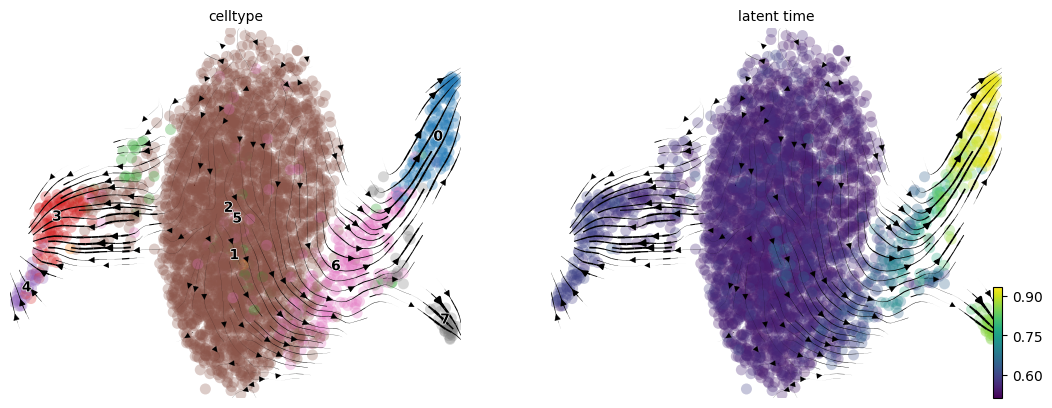

In [48]:
scv.pl.velocity_embedding_stream(organoid_latent, vkey='spliced_velocity', color=['celltype', 'latent_time'])

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, roc_auc_score

clf = LogisticRegression(penalty='none') #SVC() #DecisionTreeClassifier()

data_= organoid_latent[organoid_latent.obs['clusters'].isin(['Enterocytes', 'Tuft cells', 'Goblet cells'])].copy()
X = data_.obsm['zr']
y = LabelEncoder().fit_transform(data_.obs['clusters'].values)


organoid_cvs = cross_val_score(clf, X, y, cv=25)

print(np.mean(organoid_cvs))

0.9587878787878787


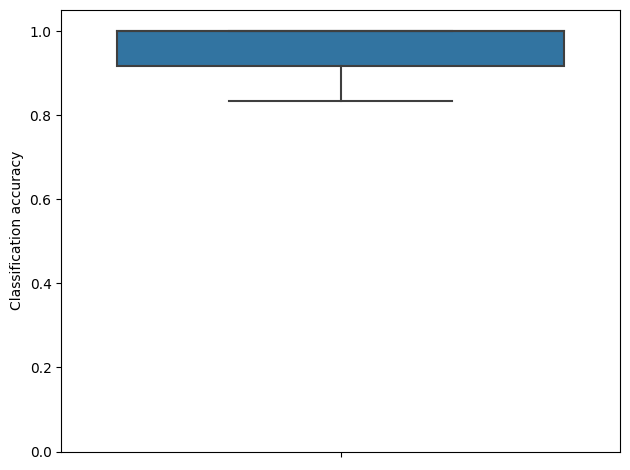

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.boxplot(y=organoid_cvs, ax=ax)

ax.set(ylim=(0,1.05))
ax.set(ylabel='Classification accuracy')
plt.tight_layout()
plt.savefig('figures/organoid_accuracy.pdf')
plt.show()

Renamed 'zr' to convention 'X_zr' (adata.obsm).


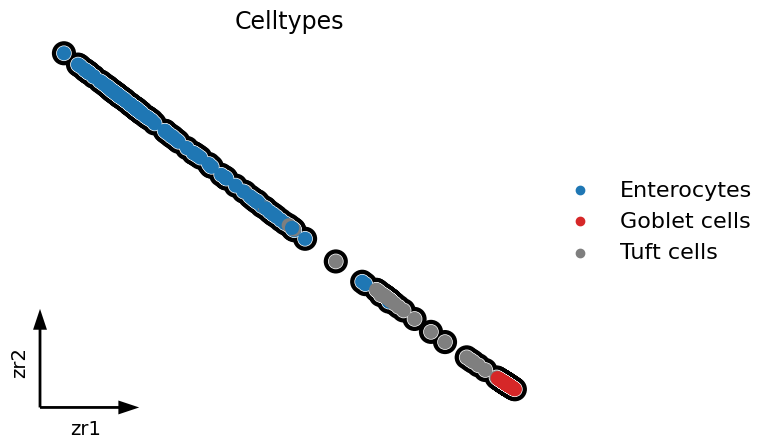

In [51]:
scv.pl.scatter(organoid_latent[organoid_latent.obs.clusters.isin(['Enterocytes', 'Goblet cells', 'Tuft cells'])],
               'zr', color='clusters', frameon='artist', title='Celltypes', fontsize=17,
              legend_fontsize=16, add_outline=True, legend_loc='right')#, save='figures/organoid_reg.pdf')

In [52]:
organoid_edges = [
    ('Stem cells', 'TA cells'), 
    ('Stem cells', 'Goblet cells'),
    ('Stem cells', 'Tuft cells'), 
    ('TA cells', 'Enterocytes')]

In [53]:
organoid_latent.obsm['latent'] = organoid_latent.X.copy()
organoid_latent.obsm['spliced_velocity_latent'] = organoid_latent.layers['spliced_velocity'].copy()

In [54]:
organoid_scores = ltv.ev.cross_boundary_correctness(organoid_latent,
                                  'clusters', 'spliced_velocity_latent', organoid_edges, 
                                                    x_emb='latent', majority_vote=True, return_raw=True)

In [55]:
scv.tl.velocity_embedding(organoid_latent, vkey='spliced_velocity', basis='pca')
organoid_pca = ltv.ev.cross_boundary_correctness(organoid_latent,
                                  'clusters', 'spliced_velocity_pca', organoid_edges, x_emb='X_pca',
                                   majority_vote=True, return_raw=True)#, majority_vote=True)

computing velocity embedding
    finished (0:00:01) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)


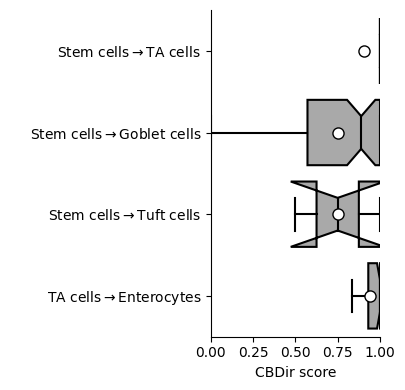

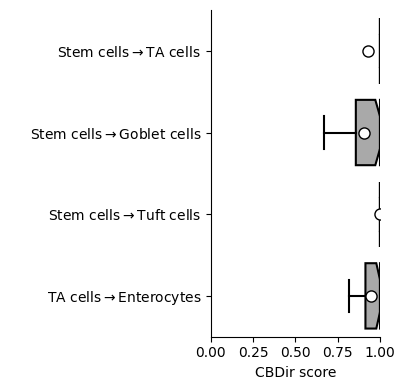

In [56]:
ax=ltv.pl.transition_scores(organoid_scores, raw=True)
ax.set(xlim=(0,1))
plt.show()

ax=ltv.pl.transition_scores(organoid_pca, raw=True)
ax.set(xlim=(0,1))
plt.show()

In [57]:
organoid_latent.obsm['X_pca_10'] = organoid_latent.obsm['X_pca'][:,:10]
scv.tl.velocity_embedding(organoid_latent, vkey='spliced_velocity', basis='pca_10')
organoid_pca_10 = ltv.ev.cross_boundary_correctness(organoid_latent,
                                  'clusters', 'spliced_velocity_pca_10', organoid_edges, x_emb='X_pca_10',
                                   majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_10', embedded velocity vectors (adata.obsm)


In [58]:
organoid_iccoh_pca = ltv.ev.inner_cluster_coh(organoid_latent,
                                  'clusters', 'spliced_velocity_pca', return_raw=True, layer=False)

organoid_iccoh_pca_10 = ltv.ev.inner_cluster_coh(organoid_latent,
                                  'clusters', 'spliced_velocity_pca_10', return_raw=True, layer=False)

# Dentate gyrus

In [59]:
dt_latent = sc.read('real_data/fits/dentategyrus_latent_adata.h5ad')

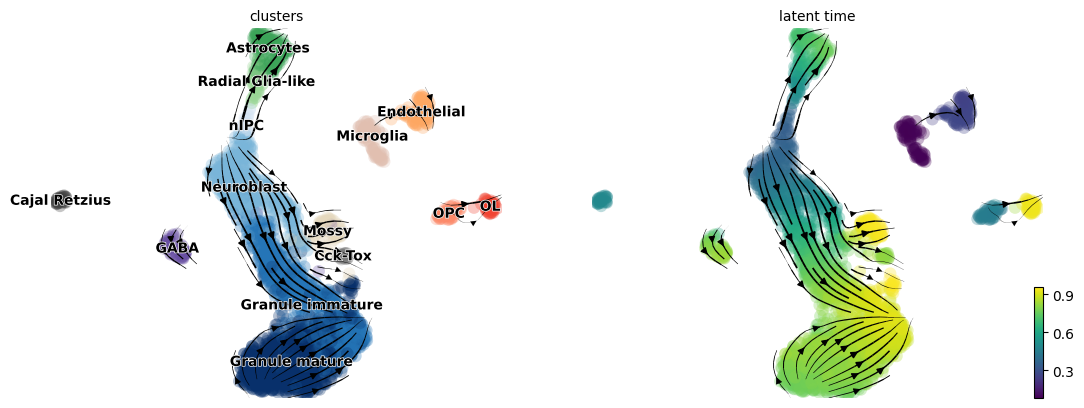

In [60]:
scv.pl.velocity_embedding_stream(dt_latent, vkey='spliced_velocity', color=['clusters', 'latent_time'])

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, roc_auc_score

clf = LogisticRegression(penalty='none') # #SVC() #DecisionTreeClassifier #LogisticRegression(penalty='none') #

data_= dt_latent[dt_latent.obs['clusters'].isin(['Granule mature', 'Astrocytes', 'OL'])].copy()
X = data_.obsm['zr']
y = LabelEncoder().fit_transform(data_.obs['clusters'].values)

clf.fit(X, y)
clf.predict(X)
dt_cvs = cross_val_score(clf, X, y, cv=25)

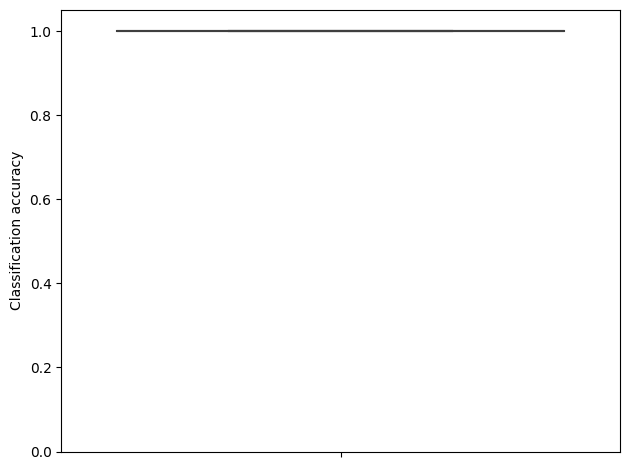

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

sns.boxplot(y=dt_cvs, ax=ax)

ax.set(ylim=(0,1.05))
ax.set(ylabel='Classification accuracy')
plt.tight_layout()
plt.savefig('figures/dt_accuracy.pdf')
plt.show()

In [63]:
dt_edges = [
    ('OPC', 'OL'), ('Radial Glia-like', 'Astrocytes'), ('Neuroblast', 'Granule immature')]

In [64]:
dt_latent.obsm['X_latent'] = dt_latent.X.copy()
dt_latent.obsm['spliced_velocity_latent'] = dt_latent.layers['spliced_velocity'].copy()

In [65]:
dt_scores = ltv.ev.cross_boundary_correctness(dt_latent,
                                  'clusters', 'spliced_velocity_latent', dt_edges, 
                                  x_emb='X_latent', majority_vote=True, return_raw=True)

In [66]:
scv.tl.velocity_embedding(dt_latent, vkey='spliced_velocity', basis='pca')
dt_pca = ltv.ev.cross_boundary_correctness(dt_latent,
                                  'clusters', 'spliced_velocity_pca', dt_edges, x_emb='X_pca', majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:01) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)


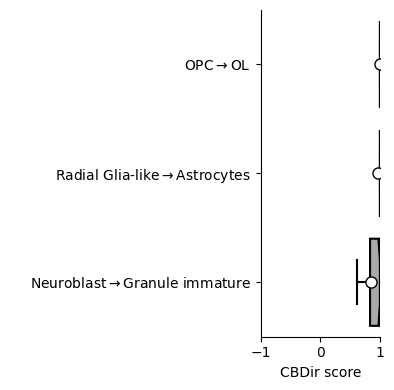

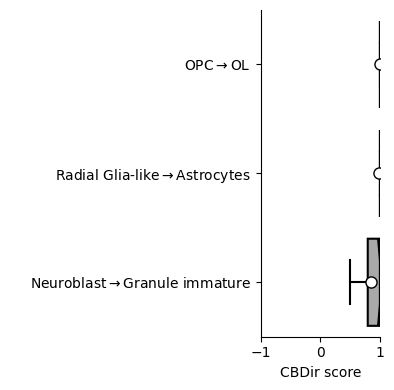

In [67]:
ltv.pl.transition_scores(dt_scores, raw=True)
plt.show()

ltv.pl.transition_scores(dt_pca, raw=True)
plt.show()

In [68]:
dt_latent.obsm['X_pca_10'] = dt_latent.obsm['X_pca'][:,:10]
scv.tl.velocity_embedding(dt_latent, vkey='spliced_velocity', basis='pca_10')
dt_pca_10 = ltv.ev.cross_boundary_correctness(dt_latent,
                                  'clusters', 'spliced_velocity_pca_10', dt_edges, x_emb='X_pca_10', majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_10', embedded velocity vectors (adata.obsm)


In [69]:
dt_iccoh_pca = ltv.ev.inner_cluster_coh(dt_latent,
                                  'clusters', 'spliced_velocity_pca', return_raw=True, layer=False)

dt_iccoh_pca_10 = ltv.ev.inner_cluster_coh(dt_latent,
                                  'clusters', 'spliced_velocity_pca_10', return_raw=True, layer=False)

# Hindbrain (Oligo)

In [70]:
hindbrain_latent = sc.read('real_data/fits/hindbrain_latent_adata.h5ad')

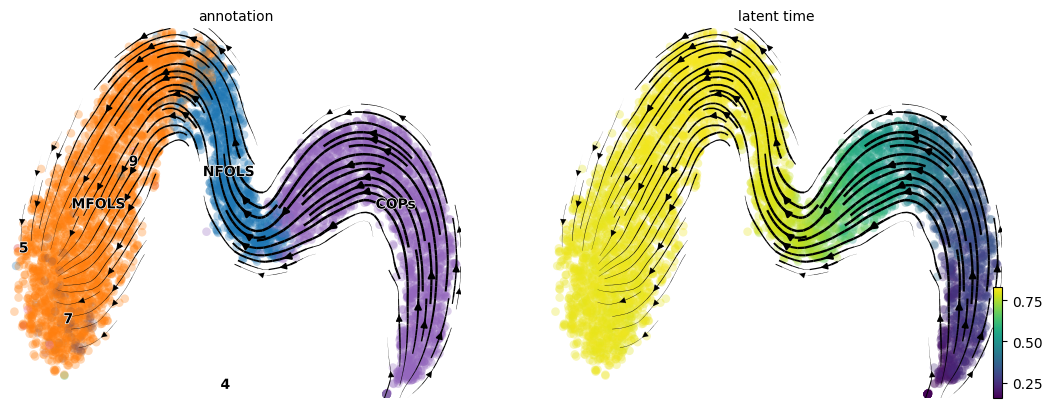

In [71]:
scv.pl.velocity_embedding_stream(hindbrain_latent, basis='tsne', 
                                 vkey='spliced_velocity', color=['annotation','latent_time'])

In [72]:
hindbrain_edges = [
    ('COPs', 'NFOLS'), 
    ('NFOLS', 'MFOLS')]

In [73]:
hindbrain_latent.obsm['latent'] = hindbrain_latent.X.copy()
hindbrain_latent.obsm['spliced_velocity_latent'] = hindbrain_latent.layers['spliced_velocity'].copy()

In [74]:
hindbrain_scores = ltv.ev.cross_boundary_correctness(hindbrain_latent,
                                  'annotation', 'spliced_velocity_latent', hindbrain_edges, 
                                                    x_emb='latent', majority_vote=True, return_raw=True)

In [75]:
scv.tl.velocity_embedding(hindbrain_latent, vkey='spliced_velocity', basis='pca')
hindbrain_pca = ltv.ev.cross_boundary_correctness(hindbrain_latent,
                                  'annotation', 'spliced_velocity_pca', hindbrain_edges, x_emb='X_pca',
                                   majority_vote=True, return_raw=True)#, majority_vote=True)

computing velocity embedding
    finished (0:00:02) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)


In [76]:
hindbrain_latent.obsm['X_pca_10'] = hindbrain_latent.obsm['X_pca'][:,:10]
scv.tl.velocity_embedding(hindbrain_latent, vkey='spliced_velocity', basis='pca_10')
hindbrain_pca_10 = ltv.ev.cross_boundary_correctness(hindbrain_latent,
                                  'annotation', 'spliced_velocity_pca_10', hindbrain_edges, x_emb='X_pca_10', majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_10', embedded velocity vectors (adata.obsm)


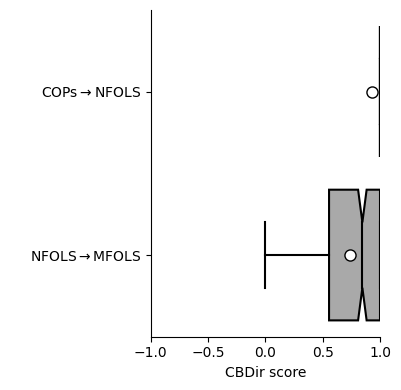

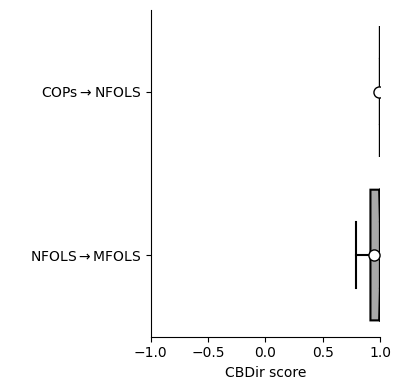

In [77]:
ltv.pl.transition_scores(hindbrain_scores, raw=True)
plt.show()

ltv.pl.transition_scores(hindbrain_pca, raw=True)
plt.show()

In [78]:
hindbrain_iccoh_pca = ltv.ev.inner_cluster_coh(hindbrain_latent,
                                  'annotation', 'spliced_velocity_pca', return_raw=True, layer=False)

hindbrain_iccoh_pca_10 = ltv.ev.inner_cluster_coh(hindbrain_latent,
                                  'annotation', 'spliced_velocity_pca_10', return_raw=True, layer=False)

# scNT seq

In [79]:
scnt_latent = sc.read('real_data/fits/scnt_latent_adata.h5ad')

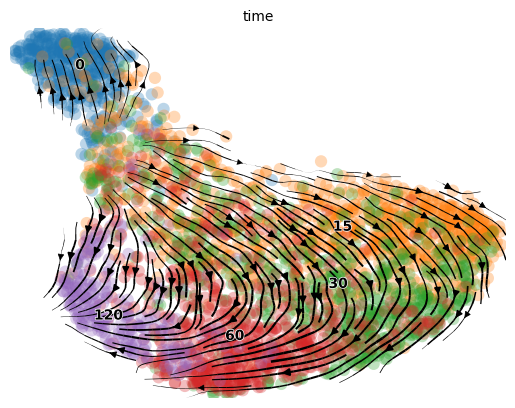

In [80]:
scv.pl.velocity_embedding_stream(scnt_latent, basis='umap', vkey='spliced_velocity', color='time')

In [81]:
scnt_edges = [
    ('0', '15'), 
    ('15', '30'),
    ('30', '60'),
    ('60','120')]

In [82]:
scnt_latent.obsm['latent'] = scnt_latent.X.copy()
scnt_latent.obsm['spliced_velocity_latent'] = scnt_latent.layers['spliced_velocity'].copy()

In [83]:
scnt_scores = ltv.ev.cross_boundary_correctness(scnt_latent,
                                  'time', 'spliced_velocity_latent', scnt_edges,
                                                 x_emb='latent',
                                   majority_vote=True, return_raw=True)

In [84]:
scv.tl.velocity_embedding(scnt_latent, vkey='spliced_velocity', basis='pca')
scnt_pca = ltv.ev.cross_boundary_correctness(scnt_latent,
                                  'time', 'spliced_velocity_pca', scnt_edges, x_emb='X_pca',
                                   majority_vote=True, return_raw=True)#, majority_vote=True)

computing velocity embedding
    finished (0:00:01) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)


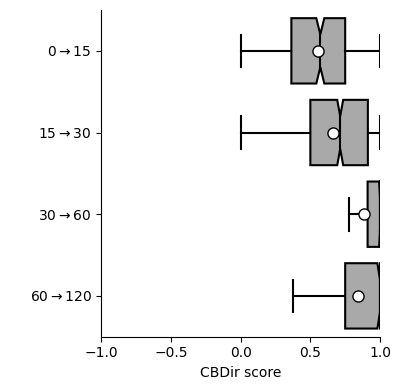

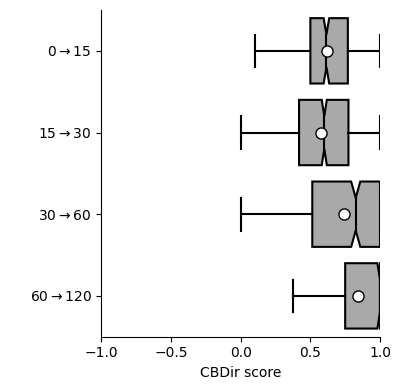

In [85]:
ltv.pl.transition_scores(scnt_scores, raw=True)
plt.show()

ltv.pl.transition_scores(scnt_pca, raw=True)
plt.show()

In [86]:
scnt_latent.obsm['X_pca_10'] = scnt_latent.obsm['X_pca'][:,:10]
scv.tl.velocity_embedding(scnt_latent, vkey='spliced_velocity', basis='pca_10')
scnt_pca_10 = ltv.ev.cross_boundary_correctness(scnt_latent,
                                  'time', 'spliced_velocity_pca_10', scnt_edges, x_emb='X_pca_10', majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_10', embedded velocity vectors (adata.obsm)


In [87]:
scnt_iccoh_pca = ltv.ev.inner_cluster_coh(scnt_latent,
                                  'time', 'spliced_velocity_pca', return_raw=True, layer=False)

scnt_iccoh_pca_10 = ltv.ev.inner_cluster_coh(scnt_latent,
                                  'time', 'spliced_velocity_pca_10', return_raw=True, layer=False)

# Mouse hematopoiesis

In [88]:
mouse_hematopoiesis_latent = sc.read('real_data/fits/hematopoiesis_latent_adata.h5ad')

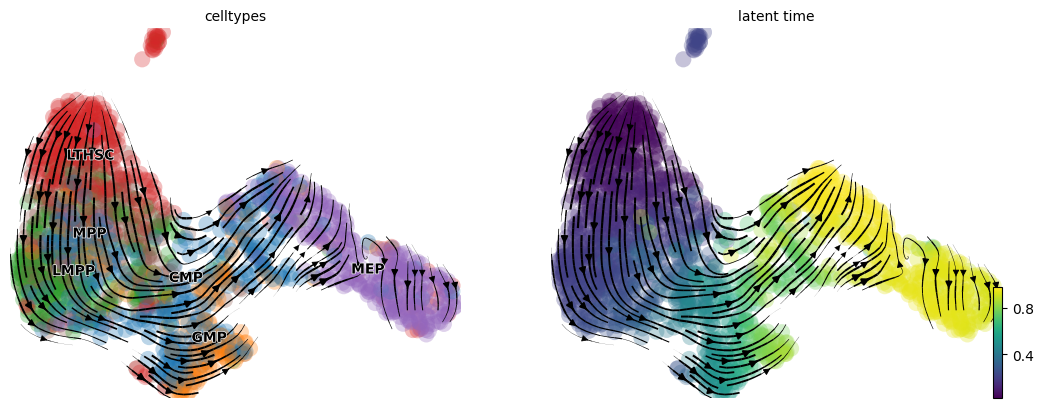

In [89]:
scv.pl.velocity_embedding_stream(mouse_hematopoiesis_latent, 
                                 basis='umap', vkey='spliced_velocity', color=['celltypes','latent_time'])

In [90]:
mouse_hematopoiesis_latent

AnnData object with n_obs × n_vars = 1772 × 20
    obs: 'cell_IDs', 'cell_types_IDs', 'cell_types_broad', 'cell_types_fine', 'cell_types_broad_cleaned', 'n_counts', 'n_genes', 'mito_ratio', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'size_factors_x', 'size_factors_s', 'size_factors_u', 'leiden', 'velocity_self_transition', 'spliced_size_factor', 'unspliced_size_factor', 'batch_id', 'celltype_id', 'root', 'latent_time', 'celltypes', 'spliced_velocity_self_transition', 'zr1', 'zr'
    uns: 'cell_types_broad_cleaned_colors', 'celltypes_colors', 'hvg', 'index_test', 'leiden', 'neighbors', 'pca', 'recover_dynamics', 'scale_spliced', 'scale_unspliced', 'spliced_velocity_graph', 'spliced_velocity_graph_neg', 'spliced_velocity_params', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'spliced_velocity_umap', 'zr'
    layers: 'spliced', 'spliced_traj', 'spliced_velocity', 'unspliced', 'unspliced_traj', 'unspliced_velocity'
   

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, roc_auc_score

clf = LogisticRegression(penalty='none') #SVC() #DecisionTreeClassifier()

data_= mouse_hematopoiesis_latent[mouse_hematopoiesis_latent.obs['celltypes'].isin(['GMP', 'MEP'])].copy()
X = data_.obsm['zr']
y = LabelEncoder().fit_transform(data_.obs['celltypes'].values)


hematopoiesis_cvs = cross_val_score(clf, X, y, cv=25)
print(np.mean(hematopoiesis_cvs))

0.9457894736842105


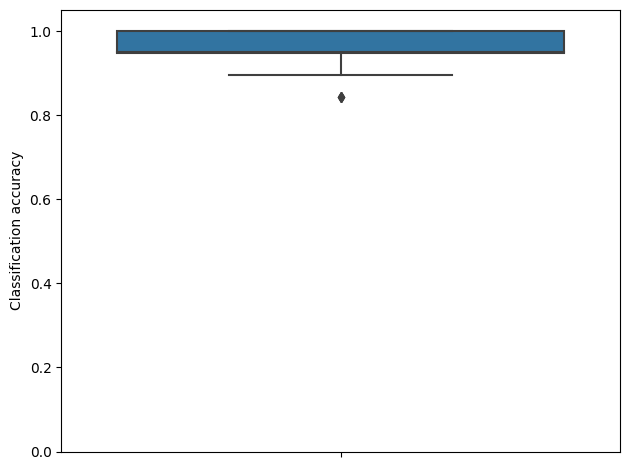

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()#figsize=(3,5))
#sns.stripplot(y=cvs, ax=ax)
sns.boxplot(y=hematopoiesis_cvs, ax=ax)

#plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
#plt.setp(ax.lines, color='k')

ax.set(ylim=(0,1.05))
ax.set(ylabel='Classification accuracy')
plt.tight_layout()
plt.savefig('figures/mouse_hematopoiesis_accuracy.pdf')
plt.show()

In [93]:
mouse_hematopoiesis_edges = [
    ('LTHSC', 'MPP'), 
    ('MPP', 'LMPP'), ('MPP', 'CMP'), ('CMP','GMP'), ('CMP', 'MEP')]

In [94]:
scv.tl.velocity_embedding(mouse_hematopoiesis_latent, vkey='spliced_velocity', basis='pca')
mouse_hematopoiesis_pca = ltv.ev.cross_boundary_correctness(mouse_hematopoiesis_latent,
                                  'celltypes', 'spliced_velocity_pca', mouse_hematopoiesis_edges, x_emb='X_pca',
                                   majority_vote=True, return_raw=True)#, majority_vote=True)

computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)


In [95]:
mouse_hematopoiesis_latent.obsm['X_pca_10'] = mouse_hematopoiesis_latent.obsm['X_pca'][:,:10]
scv.tl.velocity_embedding(mouse_hematopoiesis_latent, vkey='spliced_velocity', basis='pca_10')
mouse_hematopoiesis_pca_10 = ltv.ev.cross_boundary_correctness(mouse_hematopoiesis_latent,
                                  'celltypes', 'spliced_velocity_pca_10', mouse_hematopoiesis_edges, x_emb='X_pca_10', majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_10', embedded velocity vectors (adata.obsm)


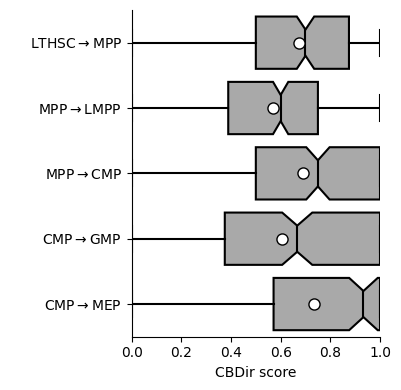

In [96]:
ax=ltv.pl.transition_scores(mouse_hematopoiesis_pca, raw=True)
ax.set(xlim=(0,1))
plt.show()

In [97]:
mouse_hematopoiesis_iccoh_pca = ltv.ev.inner_cluster_coh(mouse_hematopoiesis_latent,
                                  'celltypes', 'spliced_velocity_pca', return_raw=True, layer=False)

mouse_hematopoiesis_iccoh_pca_10 = ltv.ev.inner_cluster_coh(mouse_hematopoiesis_latent,
                                  'celltypes', 'spliced_velocity_pca_10', return_raw=True, layer=False)

# Hindbrain (GABA, Glial)

In [98]:
gaba_interneuron_latent = sc.read('real_data/fits/hindbrain_gaba_latent_adata.h5ad')

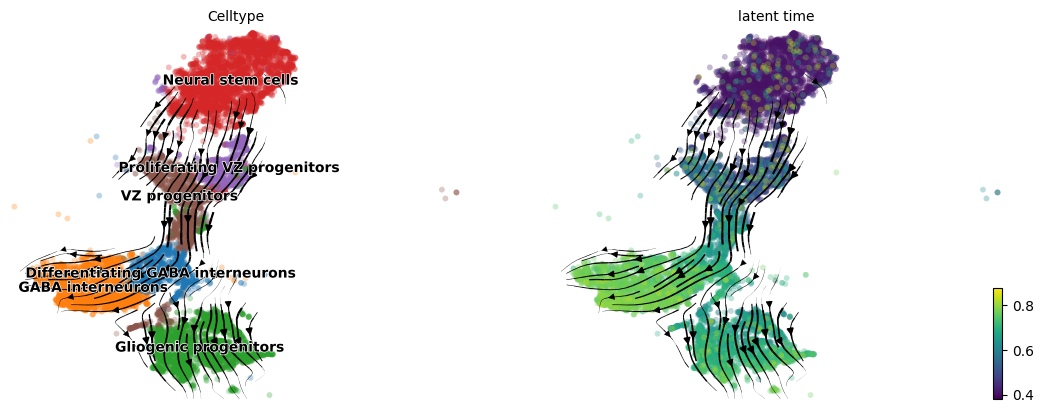

In [99]:
scv.pl.velocity_embedding_stream(gaba_interneuron_latent, basis='tsne', 
                                 vkey='spliced_velocity', color=['Celltype', 'latent_time'])

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, roc_auc_score

clf = LogisticRegression(penalty='none') #SVC() #DecisionTreeClassifier()

data_= gaba_interneuron_latent[gaba_interneuron_latent.obs['Celltype'].isin(['Gliogenic progenitors', 'GABA interneurons'])].copy()
X = data_.obsm['zr']
y = LabelEncoder().fit_transform(data_.obs['Celltype'].values)


gaba_cvs = cross_val_score(clf, X, y, cv=25)
print(np.mean(gaba_cvs))

0.9661549497847919


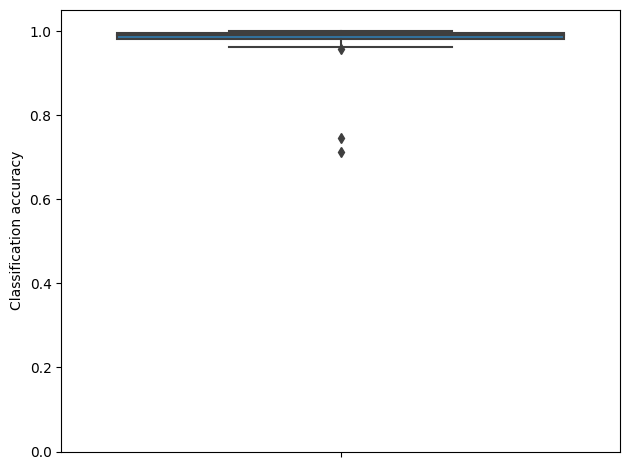

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()#figsize=(3,5))
#sns.stripplot(y=cvs, ax=ax)
sns.boxplot(y=gaba_cvs, ax=ax)

#plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
#plt.setp(ax.lines, color='k')

ax.set(ylim=(0,1.05))
ax.set(ylabel='Classification accuracy')
plt.tight_layout()
plt.savefig('figures/hindbrain_accuracy.pdf')
plt.show()

In [102]:
gaba_interneuron_edges = [('Neural stem cells', 'Proliferating VZ progenitors'), ('Proliferating VZ progenitors', 'VZ progenitors'),
                         ('VZ progenitors', 'Gliogenic progenitors'), 
                          ('VZ progenitors', 'Differentiating GABA interneurons'),
                         ('Differentiating GABA interneurons', 'GABA interneurons')]

In [103]:
scv.tl.velocity_embedding(gaba_interneuron_latent, vkey='spliced_velocity', basis='pca')
gaba_interneuron_pca = ltv.ev.cross_boundary_correctness(gaba_interneuron_latent,
                                  'Celltype', 'spliced_velocity_pca', gaba_interneuron_edges, x_emb='X_pca', 
                                                  majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:06) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)


In [104]:
gaba_interneuron_latent.obsm['X_pca_10'] = gaba_interneuron_latent.obsm['X_pca'][:,:10]
scv.tl.velocity_embedding(gaba_interneuron_latent, vkey='spliced_velocity', basis='pca_10')
gaba_interneuron_pca_10 = ltv.ev.cross_boundary_correctness(gaba_interneuron_latent,
                                  'Celltype', 'spliced_velocity_pca_10', gaba_interneuron_edges, x_emb='X_pca_10', 
                                                     majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:02) --> added
    'spliced_velocity_pca_10', embedded velocity vectors (adata.obsm)


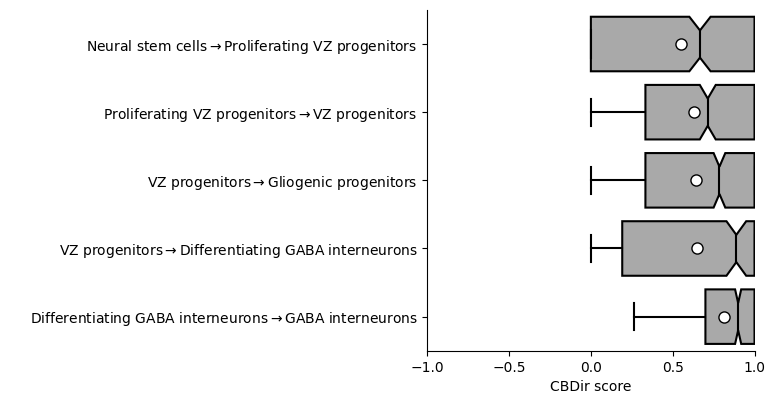

In [105]:
ltv.pl.transition_scores(gaba_interneuron_pca, raw=True)
plt.show()

In [106]:
gaba_interneuron_iccoh_pca = ltv.ev.inner_cluster_coh(gaba_interneuron_latent,
                                  'Celltype', 'spliced_velocity_pca', return_raw=True, layer=False)

gaba_interneuron_iccoh_pca_10 = ltv.ev.inner_cluster_coh(gaba_interneuron_latent,
                                  'Celltype', 'spliced_velocity_pca_10', return_raw=True, layer=False)

# Create benchmark plots

In [107]:
from itertools import chain
def flatten_dict_values(dictionary):
    return list(chain(*dictionary.values()))

def create_real_dataframe(dicts, names):
    
    results = {}
    for i in range(len(dicts)):
        results[names[i]] = np.array(flatten_dict_values(dicts[i]))
    
    max_len = max([len(results[key]) for key in results.keys()]) 
    
    values = []
    keys = []
    for key in results.keys():
        if len(results[key]) < max_len:
            new_array = np.ones(max_len) * np.nan
            new_array[:len(results[key])] = results[key]
            results[key] = new_array
            values.append(new_array)
            keys.append([key]*max_len)
        else:
            values.append(results[key])
            keys.append([key]*max_len)
    values = pd.DataFrame({'scores': np.array(values).flatten(), 'Dataset': np.array(keys).flatten()})
    return values

In [108]:
def box_plot(df, x, y, hue, ax, orient='v', palette ="Set1"):
    g = sns.boxplot(
        data=df, 
        y=y, x=x, hue=hue,ax=ax,
        orient=orient, palette = palette, fliersize=0, showmeans=True,notch=True,
        meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                   "markersize":"8"}
    )
    return g

In [109]:
df_pca = create_real_dataframe([pancreas_pca, retina_pca, bonemarrow_pca, erythroid_pca, dt_pca, organoid_pca, hindbrain_pca,
                               scnt_pca, mouse_hematopoiesis_pca, gaba_interneuron_pca], 
                               ['Pancreas', 'Retina', 'Human\n bonemarrow', 'Mouse\n erythroid', 'Dentate\n gyrus', 'Intestinal\n organoid',
                               'Hindbrain\n (Oligo)', 'scNT\n neurogenesis', 'Mouse\n hematopoiesis', 'Hindbrain\n (GABA, Glial)'])
df_pca['Model'] = 'LatentVelo'

df_pca_10 = create_real_dataframe([pancreas_pca_10, retina_pca_10, bonemarrow_pca_10, erythroid_pca_10, 
                                   dt_pca_10, organoid_pca_10, hindbrain_pca_10,
                               scnt_pca_10, mouse_hematopoiesis_pca_10, gaba_interneuron_pca_10], 
                               ['Pancreas', 'Retina', 'Human\n bonemarrow', 'Mouse\n erythroid',
                                'Dentate\n gyrus', 'Intestinal\n organoid',
                               'Hindbrain\n (Oligo)', 'scNT\n neurogenesis', 'Mouse\n hematopoiesis', 'Hindbrain\n (GABA, Glial)'])
df_pca_10['Model'] = 'LatentVelo'

In [110]:
pancreas_dyn_pca = np.load("real_data/scvelo/fits/pancreas_dynvelo_pca.npy", allow_pickle=True).item()
pancreas_stoc_pca = np.load("real_data/scvelo/fits/pancreas_stocvelo_pca.npy", allow_pickle=True).item()

retina_dyn_pca = np.load("real_data/scvelo/fits/retina_dynvelo_pca.npy", allow_pickle=True).item()
retina_stoc_pca = np.load("real_data/scvelo/fits/retina_stocvelo_pca.npy", allow_pickle=True).item()


bonemarrow_dyn_pca = np.load("real_data/scvelo/fits/bonemarrow_dynvelo_pca_.npy", allow_pickle=True).item()
bonemarrow_stoc_pca = np.load("real_data/scvelo/fits/bonemarrow_stocvelo_pca_.npy", allow_pickle=True).item()

erythroid_dyn_pca = np.load("real_data/scvelo/fits/mouse_erythroid_dynvelo_pca.npy", allow_pickle=True).item()
erythroid_stoc_pca = np.load("real_data/scvelo/fits/mouse_erythroid_stocvelo_pca.npy", allow_pickle=True).item()

dt_dyn_pca = np.load("real_data/scvelo/fits/dt_dynvelo_pca_.npy", allow_pickle=True).item()
dt_stoc_pca = np.load("real_data/scvelo/fits/dt_stocvelo_pca_.npy", allow_pickle=True).item()

organoid_dyn_pca = np.load("real_data/scvelo/fits/organoid_dynvelo_pca.npy", allow_pickle=True).item()
organoid_stoc_pca = np.load("real_data/scvelo/fits/organoid_stocvelo_pca.npy", allow_pickle=True).item()


hindbrain_pons_dyn_pca = np.load("real_data/scvelo/fits/hindbrain_pons_dynvelo_pca.npy", allow_pickle=True).item()
hindbrain_pons_stoc_pca = np.load("real_data/scvelo/fits/hindbrain_pons_stocvelo_pca.npy", allow_pickle=True).item()


scnt_dyn_pca = np.load("real_data/scvelo/fits/scnt_dynvelo_pca.npy", allow_pickle=True).item()
scnt_stoc_pca = np.load("real_data/scvelo/fits/scnt_stocvelo_pca.npy", allow_pickle=True).item()


mouse_hematopoiesis_dyn_pca = np.load("real_data/scvelo/fits/mouse_hematopoiesis_dynvelo_pca.npy", allow_pickle=True).item()
mouse_hematopoiesis_stoc_pca = np.load("real_data/scvelo/fits/mouse_hematopoiesis_stocvelo_pca.npy", allow_pickle=True).item()


hindbrain_dyn_pca = np.load("real_data/scvelo/fits/hindbrain_dynvelo_pca.npy", allow_pickle=True).item()
hindbrain_stoc_pca = np.load("real_data/scvelo/fits/hindbrain_stocvelo_pca.npy", allow_pickle=True).item()


dyn_pca = create_real_dataframe([pancreas_dyn_pca, retina_dyn_pca, bonemarrow_dyn_pca, erythroid_dyn_pca,
                                dt_dyn_pca, organoid_dyn_pca, hindbrain_pons_dyn_pca, scnt_dyn_pca,
                                 mouse_hematopoiesis_dyn_pca, hindbrain_dyn_pca], 
                               ['Pancreas', 'Retina', 'Human\n bonemarrow', 'Mouse\n erythroid', 
                                'Dentate\n gyrus',
                                'Intestinal\n organoid', 'Hindbrain\n (Oligo)', 'scNT\n neurogenesis',
                                'Mouse\n hematopoiesis', 'Hindbrain\n (GABA, Glial)'])
dyn_pca['Model'] = 'scVelo(dyn)'

stoc_pca = create_real_dataframe([pancreas_stoc_pca, retina_stoc_pca, bonemarrow_stoc_pca, erythroid_stoc_pca,
                                 dt_stoc_pca, organoid_stoc_pca, hindbrain_pons_stoc_pca, scnt_stoc_pca,
                                  mouse_hematopoiesis_stoc_pca, hindbrain_stoc_pca], 
                               ['Pancreas', 'Retina', 'Human\n bonemarrow', 'Mouse\n erythroid',
                                'Dentate\n gyrus',
                               'Intestinal\n organoid', 'Hindbrain\n (Oligo)', 'scNT\n neurogenesis',
                                'Mouse\n hematopoiesis', 'Hindbrain\n (GABA, Glial)'])
stoc_pca['Model'] = 'scVelo(stoc)'

In [111]:
df_pca = pd.concat((df_pca, dyn_pca, stoc_pca), axis=0)

In [112]:
df_pca_iccoh = create_real_dataframe([pancreas_iccoh_pca, retina_iccoh_pca, bonemarrow_iccoh_pca, 
                                      erythroid_iccoh_pca, dt_iccoh_pca, organoid_iccoh_pca, hindbrain_iccoh_pca,
                               scnt_iccoh_pca, mouse_hematopoiesis_iccoh_pca, gaba_interneuron_iccoh_pca], 
                               ['Pancreas', 'Retina', 'Human\n bonemarrow', 'Mouse\n erythroid', 'Dentate\n gyrus', 'Intestinal\n organoid',
                               'Hindbrain\n (Oligo)', 'scNT\n neurogenesis', 'Mouse\n hematopoiesis', 'Hindbrain\n (GABA, Glial)'])
df_pca_iccoh['Model'] = 'LatentVelo'

In [113]:
pancreas_dyn_pca = np.load("real_data/scvelo/fits/pancreas_dynvelo_iccoh_pca.npy", allow_pickle=True).item()
pancreas_stoc_pca = np.load("real_data/scvelo/fits/pancreas_stoc_iccoh_pca.npy", allow_pickle=True).item()

retina_dyn_pca = np.load("real_data/scvelo/fits/retina_dynvelo_iccoh_pca.npy", allow_pickle=True).item()
retina_stoc_pca = np.load("real_data/scvelo/fits/retina_stoc_iccoh_pca.npy", allow_pickle=True).item()

bonemarrow_dyn_pca = np.load("real_data/scvelo/fits/bonemarrow_dynvelo_iccoh_pca_.npy", allow_pickle=True).item()
bonemarrow_stoc_pca = np.load("real_data/scvelo/fits/bonemarrow_stoc_iccoh_pca_.npy", allow_pickle=True).item()


erythroid_dyn_pca = np.load("real_data/scvelo/fits/mouse_erythroid_dynvelo_iccoh_pca.npy", allow_pickle=True).item()
erythroid_stoc_pca = np.load("real_data/scvelo/fits/mouse_erythroid_stoc_iccoh_pca.npy", allow_pickle=True).item()


dt_dyn_pca = np.load("real_data/scvelo/fits/dt_dynvelo_iccoh_pca_.npy", allow_pickle=True).item()
dt_stoc_pca = np.load("real_data/scvelo/fits/dt_stoc_iccoh_pca_.npy", allow_pickle=True).item()


organoid_dyn_pca = np.load("real_data/scvelo/fits/organoid_dynvelo_iccoh_pca.npy", allow_pickle=True).item()
organoid_stoc_pca = np.load("real_data/scvelo/fits/organoid_stoc_iccoh_pca.npy", allow_pickle=True).item()


hindbrain_pons_dyn_pca = np.load("real_data/scvelo/fits/hindbrain_pons_dynvelo_iccoh_pca.npy", allow_pickle=True).item()
hindbrain_pons_stoc_pca = np.load("real_data/scvelo/fits/hindbrain_pons_stoc_iccoh_pca.npy", allow_pickle=True).item()


scnt_dyn_pca = np.load("real_data/scvelo/fits/scnt_dynvelo_iccoh_pca.npy", allow_pickle=True).item()
scnt_stoc_pca = np.load("real_data/scvelo/fits/scnt_stoc_iccoh_pca.npy", allow_pickle=True).item()


mouse_hematopoiesis_dyn_pca = np.load("real_data/scvelo/fits/mouse_hematopoiesis_dynvelo_iccoh_pca.npy", allow_pickle=True).item()
mouse_hematopoiesis_stoc_pca = np.load("real_data/scvelo/fits/mouse_hematopoiesis_stoc_iccoh_pca.npy", allow_pickle=True).item()


hindbrain_dyn_pca = np.load("real_data/scvelo/fits/hindbrain_dynvelo_iccoh_pca.npy", allow_pickle=True).item()
hindbrain_stoc_pca = np.load("real_data/scvelo/fits/hindbrain_stoc_iccoh_pca.npy", allow_pickle=True).item()


dyn_pca_iccoh = create_real_dataframe([pancreas_dyn_pca, retina_dyn_pca, bonemarrow_dyn_pca, erythroid_dyn_pca,
                                dt_dyn_pca, organoid_dyn_pca, hindbrain_pons_dyn_pca, scnt_dyn_pca,
                                 mouse_hematopoiesis_dyn_pca, hindbrain_dyn_pca], 
                               ['Pancreas', 'Retina', 'Human\n bonemarrow', 'Mouse\n erythroid', 
                                'Dentate\n gyrus',
                                'Intestinal\n organoid', 'Hindbrain\n (Oligo)', 'scNT\n neurogenesis',
                                'Mouse\n hematopoiesis', 'Hindbrain\n (GABA, Glial)'])
dyn_pca_iccoh['Model'] = 'scVelo(dyn)'

stoc_pca_iccoh = create_real_dataframe([pancreas_stoc_pca, retina_stoc_pca, bonemarrow_stoc_pca, erythroid_stoc_pca,
                                 dt_stoc_pca, organoid_stoc_pca, hindbrain_pons_stoc_pca, scnt_stoc_pca,
                                  mouse_hematopoiesis_stoc_pca, hindbrain_stoc_pca], 
                               ['Pancreas', 'Retina', 'Human\n bonemarrow', 'Mouse\n erythroid',
                                'Dentate\n gyrus',
                               'Intestinal\n organoid', 'Hindbrain\n (Oligo)', 'scNT\n neurogenesis',
                                'Mouse\n hematopoiesis', 'Hindbrain\n (GABA, Glial)'])
stoc_pca_iccoh['Model'] = 'scVelo(stoc)'

In [114]:
df_pca_iccoh = pd.concat((df_pca_iccoh, dyn_pca_iccoh, stoc_pca_iccoh), axis=0)

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(2,1, figsize=(15,5.5))
ax=ax.flatten()

ax[0].text(0.0, 1.15, 'd)', horizontalalignment='center', 
           verticalalignment='center', transform=ax[0].transAxes,
          fontweight='bold', fontsize=19)

ax[1].text(0.0, 1.15, 'e)', horizontalalignment='center', 
           verticalalignment='center', transform=ax[1].transAxes,
          fontweight='bold', fontsize=19)

box_plot(df_pca, x='Dataset', y='scores', hue='Model', ax=ax[0])
ax[0].plot([-0.5,10], [0.5,0.5], color='k', linestyle=':', zorder=-1)
ax[0].set_ylabel('CBDir 50 PC', fontsize=14)


from itertools import cycle
hatches = cycle(["/", "", "", "","",""])
num_locations = len(df_pca.Dataset.unique())    

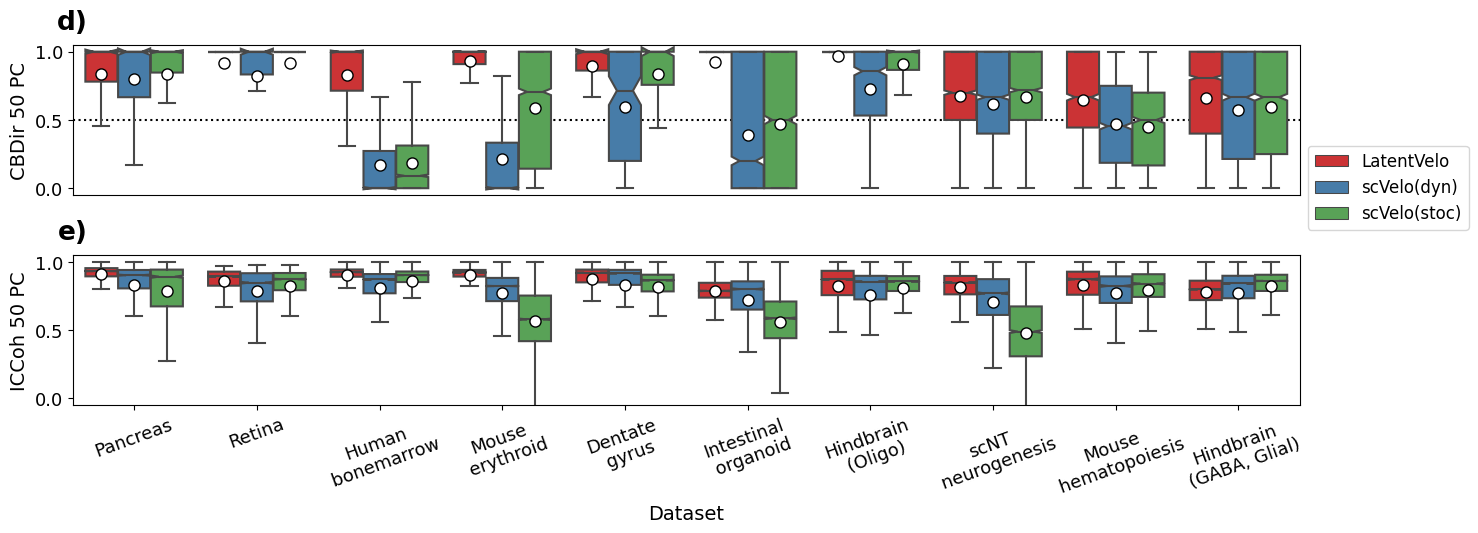

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

box_plot(df_pca_iccoh, x='Dataset', y='scores', hue='Model', ax=ax[1])
ax[1].plot([-0.25,10], [-.1,-.1], color='k', linestyle=':', zorder=-1)
ax[1].set_ylabel('ICCoh 50 PC', fontsize=14)
ax[1].set_xlabel('Dataset', fontsize=14)

ax[0].set_xticklabels([])
ax[0].set_xticks([])
ax[0].set_xlabel('')
ax[0].tick_params(labelsize=13)
ax[1].tick_params(labelsize=13)

ax[0].set_ylim(-0.05,1.05)
ax[1].set_ylim(-0.05,1.05)

ax[0].set_xlim(-0.5, 9.5)
ax[1].set_xlim(-0.5, 9.5)

plt.xticks(rotation=20)

for i in range(ax.shape[0]):
    ax[i].legend([],[], frameon=False)
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.05), fontsize=12)
plt.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.savefig('figures/real_benchmarks.pdf')
plt.show()

In [117]:
df_cvs = pd.DataFrame(np.stack((pancreas_cvs, retina_cvs, bonemarrow_cvs, dt_cvs, 
                               organoid_cvs, hematopoiesis_cvs, gaba_cvs)).T,
                     columns = ['Pancreas', 'Retina', 'Human\n bonemarrow', 'Dentate gyrus', 'Intestinal\n organoid',
                               'Mouse\n hematopoiesis', 'Hindbrain\n (GABA, Glial)'])

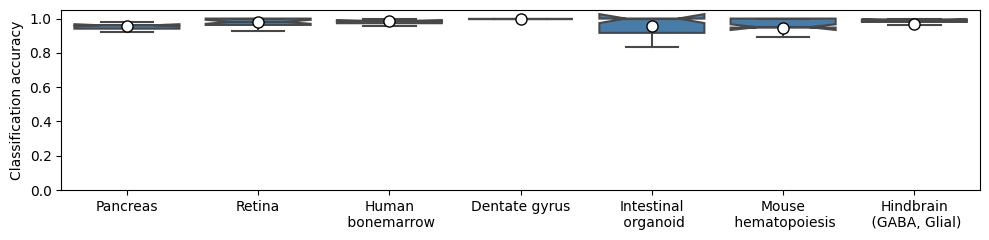

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,2.5))

g = sns.boxplot(
        data=df_cvs, ax=ax, color=sns.color_palette("Set1")[1],
        orient='v', fliersize=0, showmeans=True,notch=True,
        meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                   "markersize":"8"}
) 

ax.set_ylabel('Classification accuracy')

ax.set_ylim(0,1.05)

plt.tight_layout()
plt.savefig('figures/model_classification_accuracy.pdf')
plt.show()